In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(666)

#physical_devices = tf.config.list_physical_devices('GPU')

#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
file= open('D:/Documents/Grad-CAM/oasis_cross-sectional_labels.csv','r')

ligne= file.readlines()

file.close()

In [5]:
noms = []
alzheimer = []
homme_alz=[]
homme_saint=[]
femme_alz=[]
femme_saint=[]

for i in range (1,len(ligne)):
    li=str(ligne[i]).rstrip('\n')
    liste=li.split(',')
    #print(liste)
    if liste[1]== 'F':
        
        if liste[7] != "":
            noms.append(liste[0])
            if float(liste[7]) <=0.5:
                femme_saint.append(liste[0])
            else:
                femme_alz.append(liste[0])
            

print(len(femme_alz))
print(len(femme_saint))

20
136


In [6]:
a='4'
print(float(a))

4.0


In [7]:
femme_alz[0]

'OAS1_0028_MR1'

In [8]:
import os, shutil 

src='/Users/eiser/Desktop/'+femme_alz[1]+'.jpg'
os.path.isfile(src)==True

False

In [9]:
femme_alz_train=femme_alz[:14]
femme_alz_test=femme_alz[14:]
femme_saint_train=femme_saint[:100]
femme_saint_test=femme_saint[100:]

In [12]:
src1= 'D:/Documents/Grad-CAM/oasis_brain_no_nn_slices/X/Alzheimer/'
dst1='D:/Documents/Grad-CAM/oasis/femme/train/snt/'
for i in femme_saint_train:
    
    
    
    fname = i + '_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg'
    src=src1+fname
    dst=dst1+ fname
    if os.path.isfile(src)==True:
        shutil.copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Documents/Grad-CAM/oasis/femme/train/snt/OAS1_0003_MR1_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
image_size = (176, 208)
batch_size = 32
train_dir='/Users/eiser/Desktop/oasis/femme/train/'
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir='/Users/eiser/Desktop/oasis/femme/test/'
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 19 images belonging to 2 classes.


In [7]:
from keras import layers
from keras import models

model =models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(176,208,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [25]:
from keras.applications import VGG16
conv_base = VGG16(include_top=False, input_shape=(176,208,3))

In [23]:
from keras import models
from keras import layers



model=models.Sequential()
model.add(conv_base)
#model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 6, 512)         14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 5, 6, 512)         262656    
_________________________________________________________________
dense_4 (Dense)              (None, 5, 6, 1)           513       
Total params: 14,977,857
Trainable params: 14,977,857
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras import optimizers 

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
history= model.fit_generator(training_set,steps_per_epoch=20, epochs=10)


Epoch 1/10
20/20 [==============================] - 14s 700ms/step - loss: 0.7359 - acc: 0.6375
Epoch 2/10
20/20 [==============================] - 5s 229ms/step - loss: 0.6548 - acc: 0.6500
Epoch 3/10
20/20 [==============================] - 5s 230ms/step - loss: 0.6688 - acc: 0.6250
Epoch 4/10
20/20 [==============================] - 5s 230ms/step - loss: 0.6334 - acc: 0.6675
Epoch 5/10
20/20 [==============================] - 5s 236ms/step - loss: 0.6479 - acc: 0.6575
Epoch 6/10
20/20 [==============================] - 5s 240ms/step - loss: 0.6447 - acc: 0.6750
Epoch 7/10
20/20 [==============================] - 5s 245ms/step - loss: 0.5462 - acc: 0.7200
Epoch 8/10
20/20 [==============================] - 5s 249ms/step - loss: 0.1042 - acc: 0.9700
Epoch 9/10
20/20 [==============================] - 5s 248ms/step - loss: 4.7188e-04 - acc: 1.0000
Epoch 10/10
20/20 [==============================] - 5s 248ms/step - loss: 5.0032e-05 - acc: 1.0000


In [10]:
test_loss, test_acc= model.evaluate(test_set)

1/1 [==============================] - 2s 2s/step


In [11]:
test_acc

0.5789473652839661

In [ ]:
#gradcam

In [12]:
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [69]:
img_path='/Users/eiser/Desktop/oasis/femme/test/alz/OAS1_0425_MR1_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg'

In [70]:
from keras.preprocessing import image
img= image.load_img(img_path, target_size=(176,208,3))

x= image.img_to_array(img)

x= np.expand_dims(x, axis=0)

x= preprocess_input(x)

In [71]:
preds=model.predict(x)

In [72]:
decode_predictions(preds,top=2)[0]

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 5, 6, 1)

In [73]:
from keras import backend as K
sortie= conv_base.output[:, 1]

last_conv_layer = conv_base.get_layer('block5_conv3')

grads = K.gradients(sortie, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0,1,2))

iterate = K.function([conv_base.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]
    
    
heatmap = np.mean(conv_layer_output_value, axis=-1)



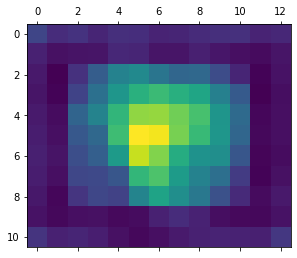

In [74]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
import matplotlib.pyplot as plt
plt.matshow(heatmap)


In [75]:
import cv2

img = cv2.imread(img_path)

heatmap= cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img


cv2.imwrite('/Users/eiser/Desktop/cerveau_cam.jpg', superimposed_img)

True